<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트벡터머신(Support Vector Machine, SVM) 실습

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd # pandas package
import numpy as np # numpy package
from scipy import stats # Scipy Package
from sklearn import datasets # sklearn dataset
from sklearn.model_selection import train_test_split # 데이터셋 분리
# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS 

# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [3]:
## 데이터셋 로드
from sklearn import datasets # sklearn dataset

data = datasets.load_iris()

# 꽃의 특징 (input data)
t_input_data = data['data']

# 꽃 종류를 수치로 나탄내 것 (0 ~ 2) (target data)
target_data = data['target']

# 꽃 종류를 이름으로 나타낸 것
flowers = data['target_names']

# 꽃 특징들의 명칭
feature_names = data['feature_names']

iris_df = pd.DataFrame(t_input_data, columns=feature_names)
iris_df['species'] = target_data

# #sepal : 꽃받침, # petal : 꽃잎
# print('꽃을 결정짓는 특징 : {}'.format(feature_names))
# print('꽃 종류 : {}'.format(flowers))
## 맨 위에 있는 데이터 5개 출력
# iris_df.head(5)

In [4]:
## 훈련 데이터와 테스트 데이터 분리
# 입력은 'sepal width (cm), petal length (cm) 2개 변수만 사용
input_data = t_input_data[:,[1,2]]

train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, test_size=0.15, random_state=20)

## 스케일링 & 표준화 : 거리기반 알고리즘은 기본으로 표준화 수행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(train_input)
X_test_std = scaler.fit_transform(test_input)

print(X_train_std.shape, train_target.shape, X_test_std.shape, test_target.shape)

(127, 2) (127,) (23, 2) (23,)


In [5]:
## SVM 패키지 임포트
from sklearn.svm import SVC # 범주형 변수
# from sklearn.svm import SVR # 연속형 변수

In [6]:
## 시각화 함수 정의
def plot_iris(X, Y, model,title,xmin=-2.5,xmax=2.5, ymin=-2.5,ymax=2.5):
    XX,YY=np.meshgrid(
        np.arange(xmin,xmax,(xmax-xmin)/1000),
        np.arange(ymin,ymax,(ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape)
    plt.contourf(XX,YY,ZZ,cmap=plt.cm.Paired_r,alpha=0.5)
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='r', marker='^', label='0', s=50)
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='g', marker='o', label='1', s=50)
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], c='b', marker='s', label='2', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)

In [7]:
## 모델링
# 선형 SVM, C = 1
model1_c1 = SVC(kernel='linear', C = 1).fit(X_train_std,train_target)

# 모델 성능 확인
print(model1_c1.score(X_train_std,train_target))
print(model1_c1.score(X_test_std,test_target))

# 오류 데이터 확인
m1_pred_y = model1_c1.predict(X_test_std)
print(np.where(test_target!=m1_pred_y))

0.937007874015748
0.8260869565217391
(array([10, 12, 18, 21]),)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


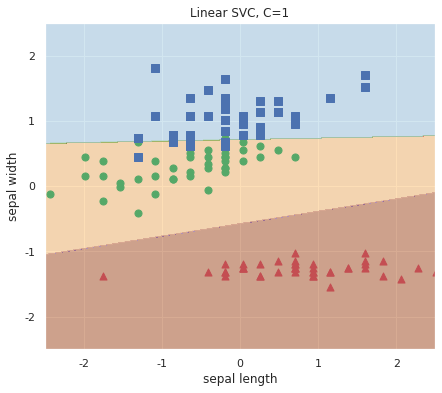

In [8]:
## 학습 데이터 시각화, Linear SVC, C=1
plt.figure(figsize=(7,6))
plot_iris(X_train_std, train_target, model1_c1, "Linear SVC, C=1")

0.9448818897637795
0.8695652173913043
(array([12, 18, 21]),)


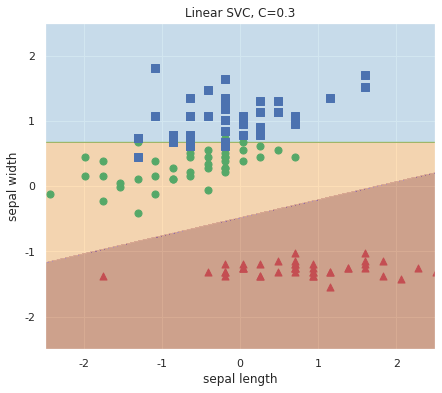

In [9]:
## 모델링, Linear SVC, C = 0.3
model1_c03 = SVC(kernel='linear', C = 0.3).fit(X_train_std,train_target)

# 모델 성능 확인
print(model1_c03.score(X_train_std,train_target))
print(model1_c03.score(X_test_std,test_target))

# 오류 데이터 확인
m1_pred_y_c03 = model1_c03.predict(X_test_std)
print(np.where(test_target!=m1_pred_y_c03))

# 학습 데이터 시각화
plt.figure(figsize=(7, 6))
plot_iris(X_train_std, train_target, model1_c03, "Linear SVC, C=0.3")

In [10]:
## 혼동행렬
## 성능 평가
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_target, m1_pred_y_c03))
print(classification_report(test_target, m1_pred_y_c03))

[[6 0 0]
 [0 8 0]
 [0 3 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.73      1.00      0.84         8
           2       1.00      0.67      0.80         9

    accuracy                           0.87        23
   macro avg       0.91      0.89      0.88        23
weighted avg       0.91      0.87      0.87        23



In [11]:
## 모델링
# 선형 SVM
model1=SVC(kernel='linear').fit(X_train_std,train_target)

# 다항 커널 SVM
model2=SVC(kernel='poly', random_state=0,gamma=10,C=1).fit(X_train_std,train_target)

# 가우시안 커널 SVM
model3=SVC(kernel='rbf',random_state=0,gamma=1,C=1).fit(X_train_std,train_target)

In [12]:
## train data score
print(model1.score(X_train_std,train_target))
print(model2.score(X_train_std,train_target))
print(model3.score(X_train_std,train_target))

## test data score
print(model1.score(X_test_std,test_target))
print(model2.score(X_test_std,test_target))
print(model3.score(X_test_std,test_target))

0.937007874015748
0.952755905511811
0.952755905511811
0.8260869565217391
0.8260869565217391
0.8260869565217391


<function matplotlib.pyplot.show>

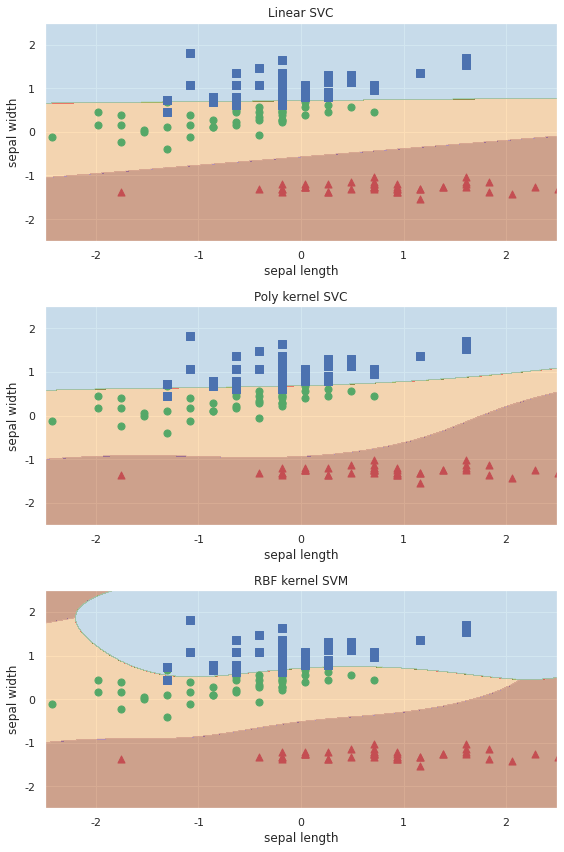

In [13]:
## 시각화
plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_train_std, train_target, model1, "Linear SVC")
plt.subplot(312)
plot_iris(X_train_std, train_target, model2, "Poly kernel SVC")
plt.subplot(313)
plot_iris(X_train_std, train_target, model3, "RBF kernel SVM")
plt.tight_layout()
plt.show